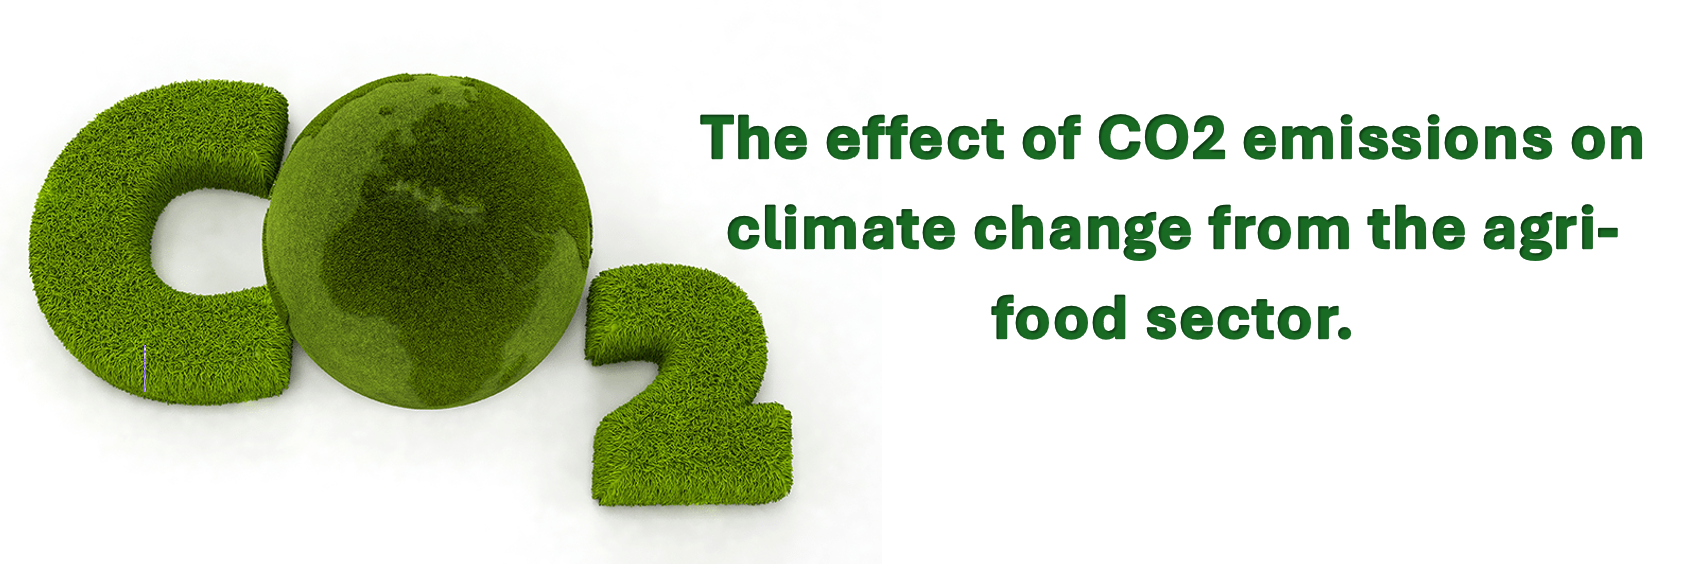

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Data Cleaning**](#chapter3)
    * [3.1 Missing data**](#section_3_1)
    * [3.2 Duplicates**](#section_3_2)
    * [3.3 Outliers**](#section_3_3)
    * [3.4 Additional Features**](#section_3_4)
* <b>[4. Exploratory Data Analysis (EDA)**](#chapter4)
* <b>[5. Feature Engineering**](#chapter5)</b>
    * [5.1 Categorical variables**](#section_5_1)
    * [5.2 Check for linearity**](#section_5_2)
    * [5.3 Check for outliers**](#section_5_3)
    * [5.4 Variable variance analysis**](#section_5_4)
* [6. Modeling](#chapter6)
    * [6.1 Time series regression**](#section_6_1)
    * [6.2 Predictive regression**](#section_6_2)
* [7. Model Performance](#chapter7)
    * [7.1 Comparative analysis**](#section_7_1)
    * [7.2 Residual analysis**](#section_7_2)
* <b>[8. Conclusion**](#chapter8)</b>
* [9. References](#chapter9)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>




> <b> Objective of the Project:</b> The aim of this project is to analyse and predict the effect of CO2 emissions on climate change from the agri-food sector. We aim to understand the impact of agricultural activities on climate change and develop strategies for sustainable practices. We will explore various emission sources, perform regression analysis to predict temperature variations. These study is of importance as it will enable us to offer recommendations and actionable insights for the stakeholders to contribute to the ongoing efforts to promote sustainability within the agri-food sector.

> <b> Data Source:</b> We use a comprehensive dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). A data dictionary on the dataset features is given in [ReadME](https://github.com/VuyiswaK/2401PTDS_Regression_Project/blob/main/README.md) file of the repository.

> <b> Key Questions or Hypotheses:</b> We aim to 1) determine the total $CO_2$ emission in the agri-food sector over time, we expect an increasing trend and 2) find suitable predictors for total $CO_2$ emissions, we expect the source with highest $CO_2$ emission will have the highest correlation to  total $CO_2$ emissions.

> <b> Methodology Overview:</b> Here is a brief overview of the methods use: 
>1) We use **exploratory data analysis** to explore the data and find trends and patterns.\
2) We use **time series regression** to predict what the $CO_2$ emission levels will in 2050. \
3) We conduct **univariate or multivariate analysis** after feature selection to predict total $CO_2$ emissions using various regression models. \
4) We choose the best model by conducting a **comparative analysis** of the predictive errors of the models. \
5) We display **residual plots** for further **regression analysis** of the predictive results to improve the prediction capabilities of our chosen model.  


**Click [here](https://trello.com/b/pp38L0zb/regression-project) for the project board.**

**Click [here](https://docs.google.com/presentation/d/1XtgWPEwaqasPQ3seFCo9_MNaBUzFI_k4GUX0HtbTekg/edit#slide=id.p) for project slides.**

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>


+ To apply **exploratory data analysis** to find interesting insights and patterns from the data.
+ To implement **feature engineering** techniques to extract meaningful information for our regression models.
+ To model and assess various **linear regression models for the prediction of $CO_2$ emission**.

---

## 2. Importing Packages & Loading Data <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [63]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
path = os.getcwd()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, LinearRegression , Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.graphics.correlation import plot_corr



In [64]:
# loading dataset
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head() 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [65]:
# The copy of the dataframe
df_copy = df.copy()

First look at the shape of the dataframe by using `.shape`.

In [66]:
# Displays the number of rows and columns
df_copy.shape

(6965, 31)

The dataset consists of 6965 rows (observations) and 31 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [67]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

We have already observed some columns that have null values, so we expect to clean these in the next section. Below we load Continent data to include a continent field in the next section as the Area field is a bit too granular to display all Areas in a view, so we will observe $CO_2$ emissions from a continental perspective.

In [68]:
# loading dataset (Country Continent dataset)
continent_df = pd.read_csv("world_population.csv", index_col=False)
continent_df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


---

## 3. Preliminary Data Cleaning <a class="anchor" id="chapter3"></a>

With our data loaded we now consider doing some preliminary data preprocessing

### 3.1 Missing data <a class="anchor" id="section_3_1"></a>


The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [69]:
missing_columns = []
def check_null_values(df_copy):
    for column in df_copy:
        if df_copy[column].isnull().any():
            missing_columns.append(column)
            print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))
check_null_values(df_copy)

Savanna fires has 31 null values
Forest fires has 93 null values
Crop Residues has 1389 null values
Forestland has 493 null values
Net Forest conversion has 493 null values
Food Household Consumption has 473 null values
IPPU has 743 null values
Manure applied to Soils has 928 null values
Manure Management has 928 null values
Fires in humid tropical forests has 155 null values
On-farm energy use has 956 null values


About 11 columns have missing values. Crop residues has the most missing values about **20% of data is missing**. The best way to handle the missing data in our case is to impute the null values, rather than removing the columns or rows.

In [70]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for k in missing_columns:
    imputer.fit(np.array(df_copy[k]).reshape(-1,1))
    df_imputed = imputer.transform(np.array(df_copy[k]).reshape(-1,1))
    df_copy[k] = df_imputed

In [71]:
check_null_values(df_copy) #Check after imputation that there is no null values 

### 3.2 Duplicates <a class="anchor" id="section_3_2"></a>


In [72]:
def count_duplicate_rows(df_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count
count_duplicate_rows(df_copy)

0

We have handled misisng data and there are no duplicates, next we check for outleirs.

### 3.3 Outliers  <a class="anchor" id="section_3_3"></a>


**Statistic summary**

In [73]:
df_copy.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5234.597927,3695.155566,3310.818022,17613.825187,15861.445678,1429.159367,5616.748808,78882.488294,9.751121e+04,24897.935876,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.053094e+05,3004.298828,9103.556202,7429.808959,22669.847760,3228.341292,11738.409960,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,25.360100,181.260800,0.000000,6.000000,27.958600,-5960.829600,0.000000e+00,13.797400,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,5.193070e+01,23.119500,139.669900,52.707800,0.000000,0.000000,17.738200,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.690800,0.646500,193.083100,534.817400,0.000000,13.000000,204.962800,-128.411600,1.259940e+02,223.149000,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,1.338400e+03,189.282900,972.567400,427.217100,0.000000,0.000000,282.527900,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,122.685600,78.057200,998.706309,1536.640000,690.408800,116.325487,1207.000900,0.000000,9.877472e+03,2362.654300,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,1.448474e+04,923.225603,2430.792600,2263.344946,0.000000,20.284300,3008.982252,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


There is a clear gap between the maximum values and quartile 3 values, indicating the existance of outliers for most of the variables. We display **violin plots** for all the numerical varaibles to obtain a visual display of the statistic summary. This could also be a result of having more than period, influencing the perceived outliers.

**Violin plots**

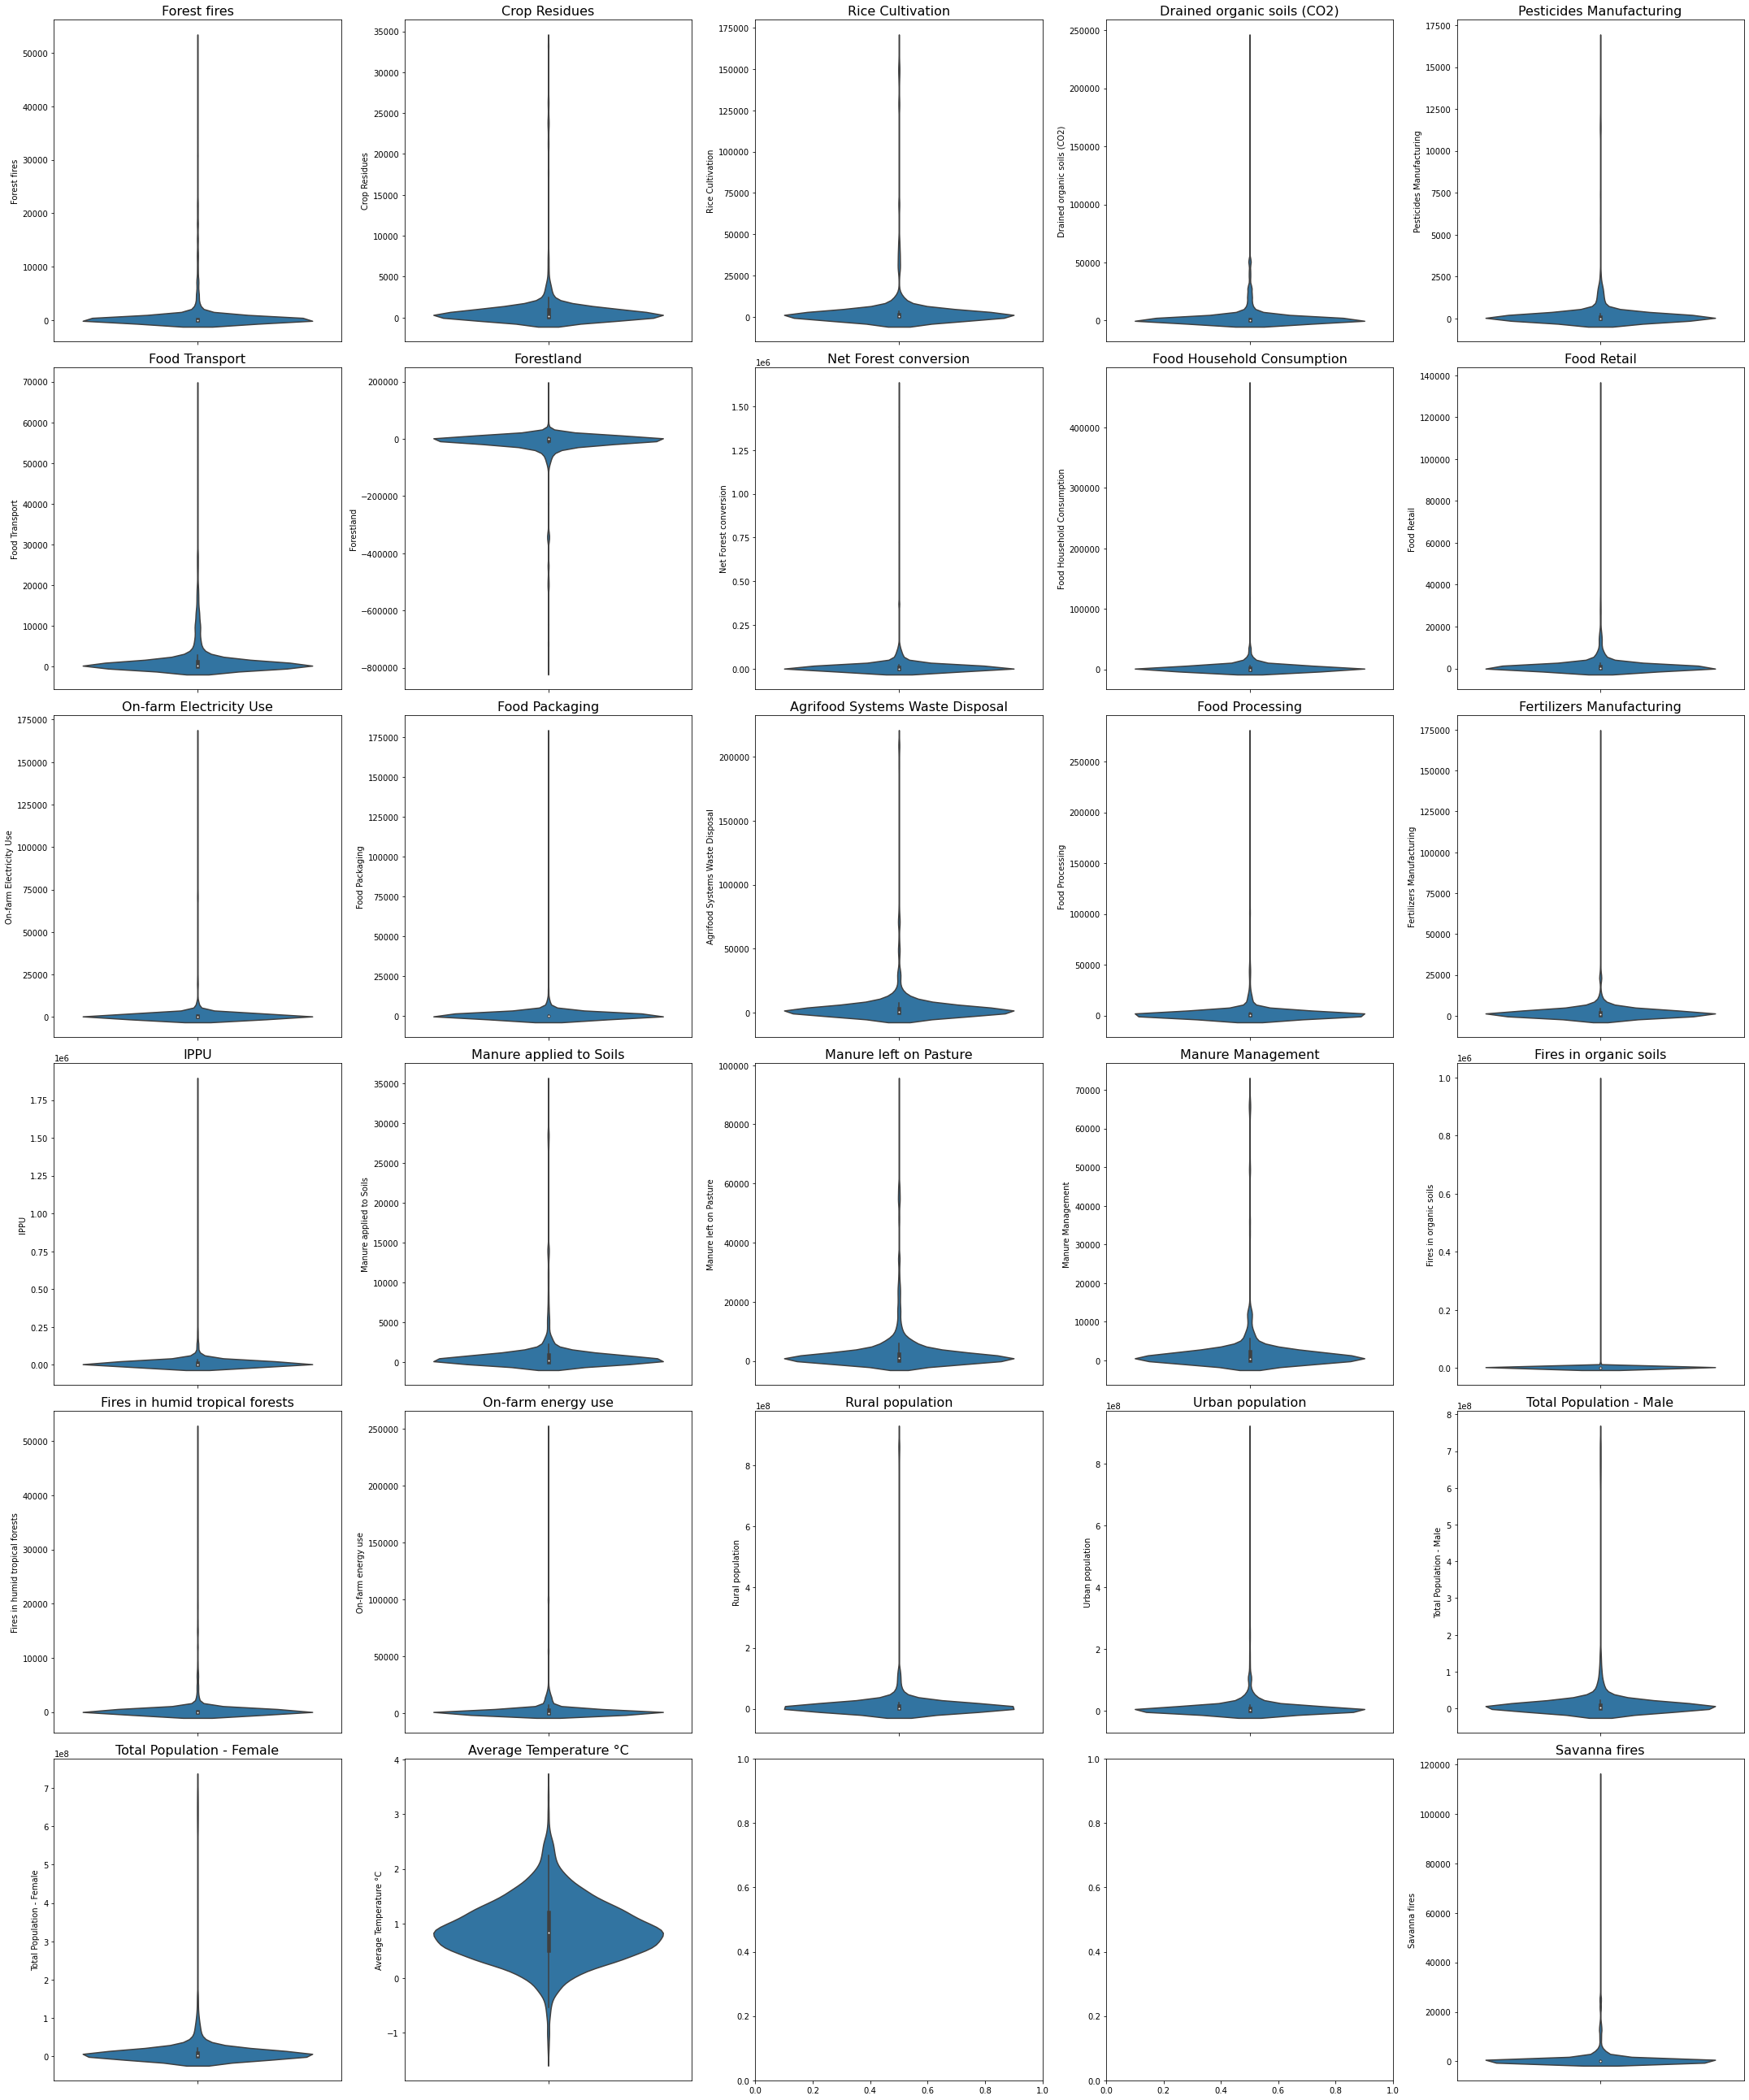

In [74]:
fig, axs = plt.subplots(6,5, figsize=(30,36),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'total_emission'],axis = 1)

for index, column in enumerate(df_copy_2.columns):
    axs[index-1].set_title((column),fontsize=16)
    sns.violinplot( y=column, data=df_copy_2, ax = axs[index-1])
    
fig.tight_layout()

This suggests possible existance of outliers in almost all the features except Temperature. We check further using z scores to extract these outliers, and have an indication of how many outliers exists and whether we should completely remove the rows with outliers or the columns.Typically, a Z-score greater than 3 or less than -3 is considered an outlier. 

**Z-scores**

In [75]:
import pandas as pd
import numpy as np
from scipy import stats

outliers = 0
for index, column in enumerate(df_copy_2.columns):
    outliers += len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3])
    print("{} has {} outliers".format(column,len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3])))

Savanna fires has 122 outliers
Forest fires has 184 outliers
Crop Residues has 131 outliers
Rice Cultivation has 124 outliers
Drained organic soils (CO2) has 48 outliers
Pesticides Manufacturing has 123 outliers
Food Transport has 137 outliers
Forestland has 171 outliers
Net Forest conversion has 78 outliers
Food Household Consumption has 92 outliers
Food Retail has 96 outliers
On-farm Electricity Use has 94 outliers
Food Packaging has 70 outliers
Agrifood Systems Waste Disposal has 124 outliers
Food Processing has 90 outliers
Fertilizers Manufacturing has 66 outliers
IPPU has 77 outliers
Manure applied to Soils has 138 outliers
Manure left on Pasture has 163 outliers
Manure Management has 129 outliers
Fires in organic soils has 22 outliers
Fires in humid tropical forests has 148 outliers
On-farm energy use has 97 outliers
Rural population has 93 outliers
Urban population has 116 outliers
Total Population - Male has 93 outliers
Total Population - Female has 93 outliers
Average Temperat

In [76]:
outliers

2978

There are clearly outliers, that have very high z-scores. Howver, if we remove rows with at least one outlier that will result in the removal of 2978 rows. We need to first remove non informative columns in the feature selection section first, and we will tend to the outliers thereafter, to ensure rows with no outliers in the necessary features are not compromised.

### 3.4 Additional Features  <a class="anchor" id="section_3_4"></a>


**Adding continent to our data for further EDA**

In [77]:
# Function to check the first five letters and output another column

continent_df['Area'] = continent_df['Country/Territory']
df_copy = pd.merge(df_copy, continent_df[['Area','Continent']], on='Area', how='left')
df_copy.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Continent
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,Asia
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,Asia
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,Asia
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,Asia
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,Asia


In [78]:
len(df_copy[df_copy.Continent.isna()].Area.unique())

38

There are 38 unassigned countries, due to a mismatch of name we will manually assign these as there aren't many 

In [79]:
df_copy.loc[df_copy.Area.isin(['Belgium-Luxembourg','Channel Islands','Czechia', 'Czechoslovakia','Holy See','Netherlands (Kingdom of the)','Netherlands Antilles (former)','Republic of Moldova','Serbia and Montenegro','United Kingdom of Great Britain and Northern Ireland','Yugoslav SFR']), 'Continent'] = 'Europe'
df_copy.loc[df_copy.Area.isin(['Bolivia (Plurinational State of)','Falkland Islands (Malvinas)','Venezuela (Bolivarian Republic of)']), 'Continent'] = 'South America'
df_copy.loc[df_copy.Area.isin(['Brunei Darussalam','China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of',"Democratic People's Republic of Korea",'Iran (Islamic Republic of)',"Lao People's Democratic Republic",'Republic of Korea','Russian Federation','Syrian Arab Republic','USSR', 'Viet Nam']), 'Continent'] = 'Asia'
df_copy.loc[df_copy.Area.isin(['Cabo Verde','Congo','Democratic Republic of the Congo', 'Ethiopia PDR','Saint Helena, Ascension and Tristan da Cunha','Sudan (former)','United Republic of Tanzania']), 'Continent' ] = 'Africa'
df_copy.loc[df_copy.Area.isin(['Micronesia (Federated States of)','Pacific Islands Trust Territory','Wallis and Futuna Islands']), 'Continent'] = 'Oceania'
df_copy.loc[df_copy.Area.isin(['United States of America']) , 'Continent'] = 'North America'


In [80]:
len(df_copy[df_copy.Continent.isna()].Area.unique())

0

---

## 4. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter4"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

**$CO_2$ over time**

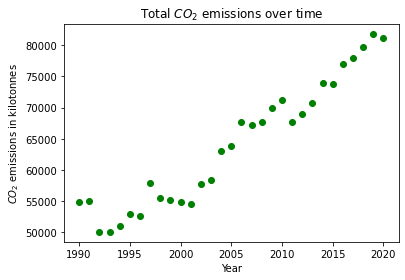

In [19]:
grouped = df_copy.groupby(['Year']).mean().reset_index() # group data by year 


# Plot scatter of CO2 emission by year 
plt.scatter(grouped.Year, grouped.total_emission, color = 'g')
plt.title('Total '+ r'$CO_2$' + ' emissions over time')
plt.xlabel('Year')
plt.ylabel( r'$CO_2$'+ ' emissions in kilotonnes')

coefficients = np.polyfit(grouped.Year, grouped.total_emission,1)
slope, intercept = coefficients

# Generate the line of best fit
line_of_best_fit = slope * grouped.Year + intercept

# Plot the data points
#plt.plot(grouped.Year, line_of_best_fit, color='black', label='Data points')

plt.show()

**Rate of increase in $CO_2$ emissions**

In [20]:
""" Rate of increase in CO2 emissions """
# Fit a straight line to the data
coefficients = np.polyfit(grouped.Year, grouped.total_emission,1)
slope, intercept = coefficients

slope

1066.696225679624

**$CO_2$ emission by Area & population (Demographics)**

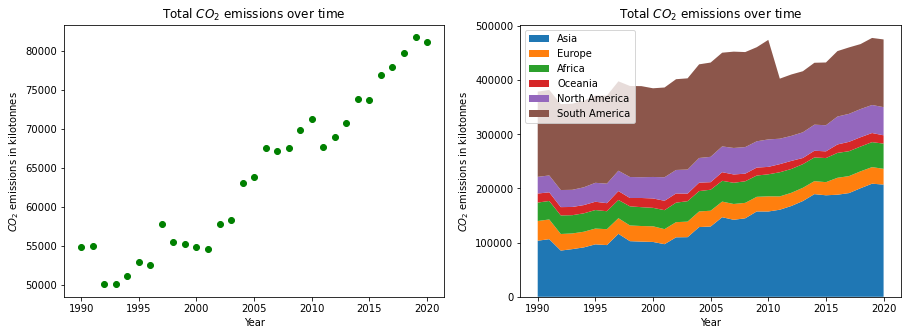

In [21]:
grouped = df_copy.groupby(['Year']).mean().reset_index()
grouped_cont = df_copy.groupby(['Continent','Year']).mean().reset_index()

x = list(grouped.Year)

fig , axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(grouped.Year, grouped.total_emission, color = 'g')
axs[0].set_title('Total '+ r'$CO_2$' + ' emissions over time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel( r'$CO_2$'+ ' emissions in kilotonnes')

cont = list(df_copy.Continent.unique())
colour = ['black','green','teal','blue', 'gray', 'brown']
y = np.vstack([grouped_cont[grouped_cont.Continent == i].total_emission for i in cont])
axs[1].stackplot(x, y, labels = cont)
axs[1].set_title('Total '+ r'$CO_2$' + ' emissions over time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel( r'$CO_2$'+ ' emissions in kilotonnes')
axs[1].legend(loc = 'upper left')


plt.show()

$CO_2$ emission have been increasing throughout the years, at a rate of about 1066 kts a year. This is indeed concerning. Asia has a steady increase as well and have the largest CO2 emission after 2010. The drop in South America's CO2 emission in 2010 should be studied.

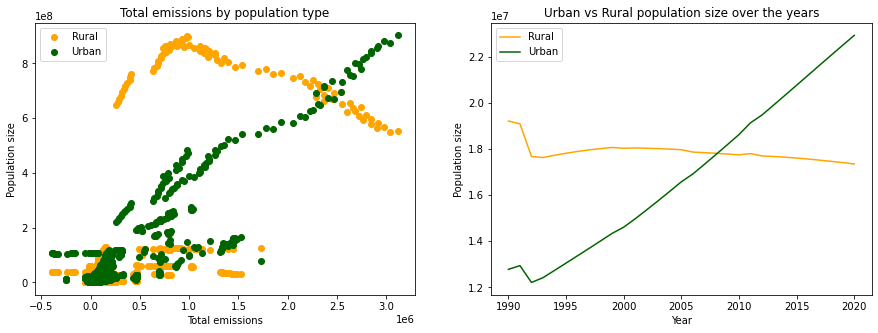

In [22]:
fig , axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df.total_emission, df['Rural population'], color = 'orange', label = "Rural")
axs[0].scatter(df.total_emission, df['Urban population'], color = "darkgreen" ,label = "Urban")
axs[0].legend()
axs[0].set_ylabel('Population size')
axs[0].set_xlabel('Total emissions')
axs[0].set_title('Total emissions by population type')

axs[1].plot(grouped.Year, grouped['Rural population'], color = 'orange', label = "Rural")
axs[1].plot(grouped.Year, grouped['Urban population'], color = "darkgreen" ,label = "Urban")
axs[1].legend()
axs[1].set_ylabel('Population size')
axs[1].set_xlabel('Year')
axs[1].set_title('Urban vs Rural population size over the years')

fig.show()


Areas with high urban population seem to be the highest contributor of CO2 emissions. High total emissions correspond to a high urban population count. Surprisingly high total emission correspond to low rural population size. There has been an increase in the urban population throughout the years, either birth rates are higher in the urban cities, and migration from rural to urban as seen by the gradual decrease in the rural population.

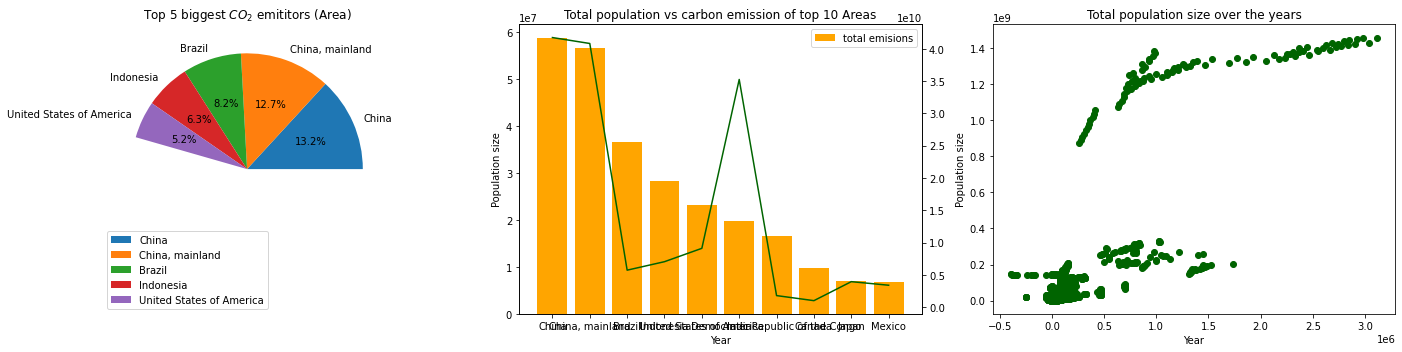

In [23]:
fig , axs = plt.subplots(1, 3, figsize=(20, 5))
total = sum(df_copy.total_emission)

grouped_cont = df_copy.groupby(['Area']).sum().reset_index().sort_values(['total_emission'],ascending=False).head()
perc = np.array([grouped_cont.total_emission/total])[0]
axs[0].pie(perc, labels = grouped_cont.Area, autopct='%1.1f%%')
axs[0].legend()
axs[0].set_title(r'Top 5 biggest $CO_2$ emititors (Area)')


#grouped_cont = df_copy.groupby(['Continent']).sum().reset_index().sort_values(['total_emission'],ascending=False)

grouped_cont = df_copy.groupby(['Area']).sum().reset_index().sort_values(['total_emission'],ascending=False).head(10)
axs[1].bar(grouped_cont.Area, grouped_cont.total_emission, color = 'orange', label = "total emisions")
axis = axs[1].twinx()
axis.plot(grouped_cont.Area, grouped_cont['Urban population']+ grouped_cont['Rural population'], color = "darkgreen" ,label = "population size")
axs[1].legend()
axs[1].set_ylabel('Population size')
axs[1].set_xlabel('Year')
axs[1].set_title('Total population vs carbon emission of top 10 Areas')

axs[2].scatter(df.total_emission,df['Urban population']+ df['Rural population'], color = "darkgreen")
axs[2].set_ylabel('Population size')
axs[2].set_xlabel('Year')
axs[2].set_title('Total population size over the years')

fig.tight_layout()

fig.show()

**$C0_2$ emissions by sources**

In [24]:
df_copy.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'Continent'],
      dtype='object')

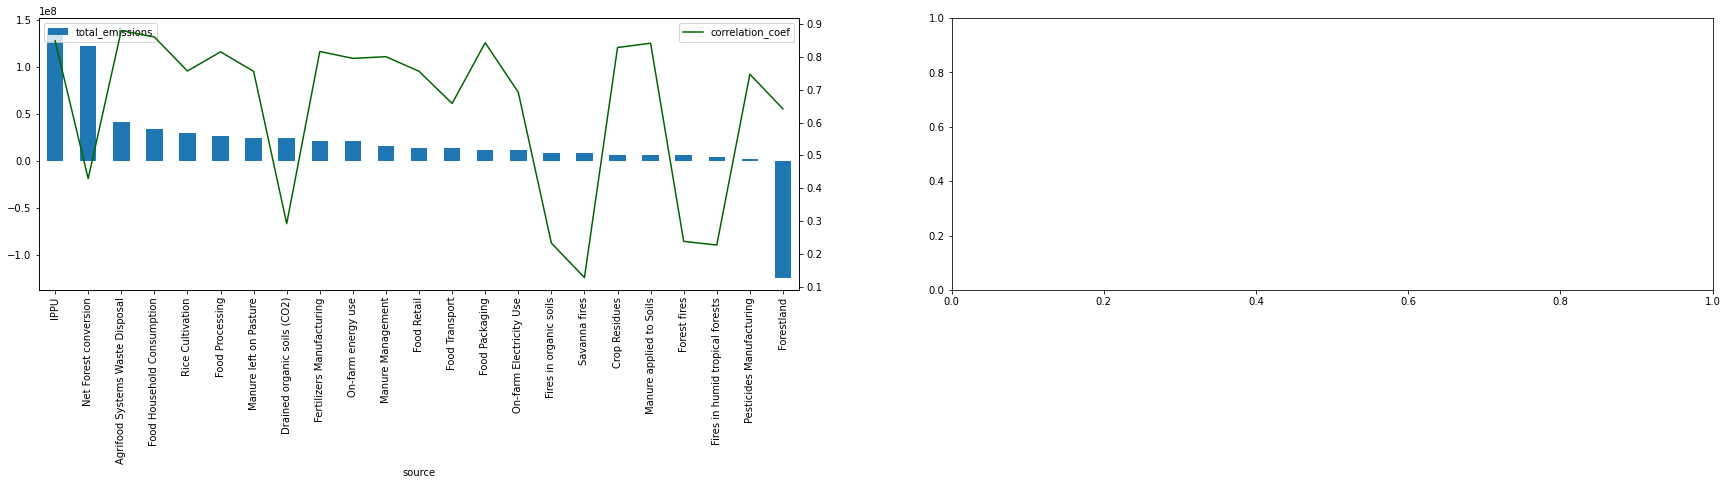

In [25]:
emissions = ['Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption', 'Food Retail', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests','Forestland','On-farm Electricity Use','On-farm energy use','Net Forest conversion']


mean = [np.sum(df_copy[col]) for col in emissions]


df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'Continent'],axis = 1)
corr = df_copy_2.corr()
dependent_var_corr =  np.abs(corr['total_emission']).sort_values(ascending=False)

correlation = [dependent_var_corr[col] for col in emissions] 


em = pd.DataFrame({ 
    'source': emissions, 
    'total_emissions': mean,
    'correlation_coef' : correlation
}) 


em = em.sort_values(by='total_emissions', ascending = False)

  
# plotting graph 


fig , axs = plt.subplots(1, 2, figsize=(30, 5))

em.plot(x="source", y=['total_emissions'], kind="bar", ax = axs[0]) 
axs[0].legend(loc = 'upper left')

ax_cop= axs[0].twinx()

em.plot(x="source", y=['correlation_coef'], color = 'darkgreen', ax = ax_cop)

plt.show()

IPPU, Net Forest conversion, Forestland on average contribute the most to the total co2 emissions. The contributions by pesticides manufacturing, forest fires and fires in humid tropical forests are somewhat negligible

---

## 5. Feature Engineering <a class="anchor" id="chapter5"></a>

### 5.1 Categorical variables  <a class="anchor" id="section_5_1"></a>
 
Continent and Area are the only categorical data. Continent is a feature that we added, Area has about 216 categories. The category count is too high to convert to numerical encoding and will add up creating bias in our data due to it's granular nature, which may lead to overfitting.

### 5.2  Check for linearity  <a class="anchor" id="section_5_2"></a>
 

The first step in our analysis involves assessing the mathematical relationship between each predictor variable and the response variable. Linearity is a crucial aspect that we need to evaluate. A linear relationship implies that the change in the response variable *Y*, resulting from a one-unit change in the predictor $X_j$, remains consistent across different values of $X_j$.

We exclude Area and Continet from our data. We also remove Year as a possible predictor variable, we will take it into consideration the time series regression section.

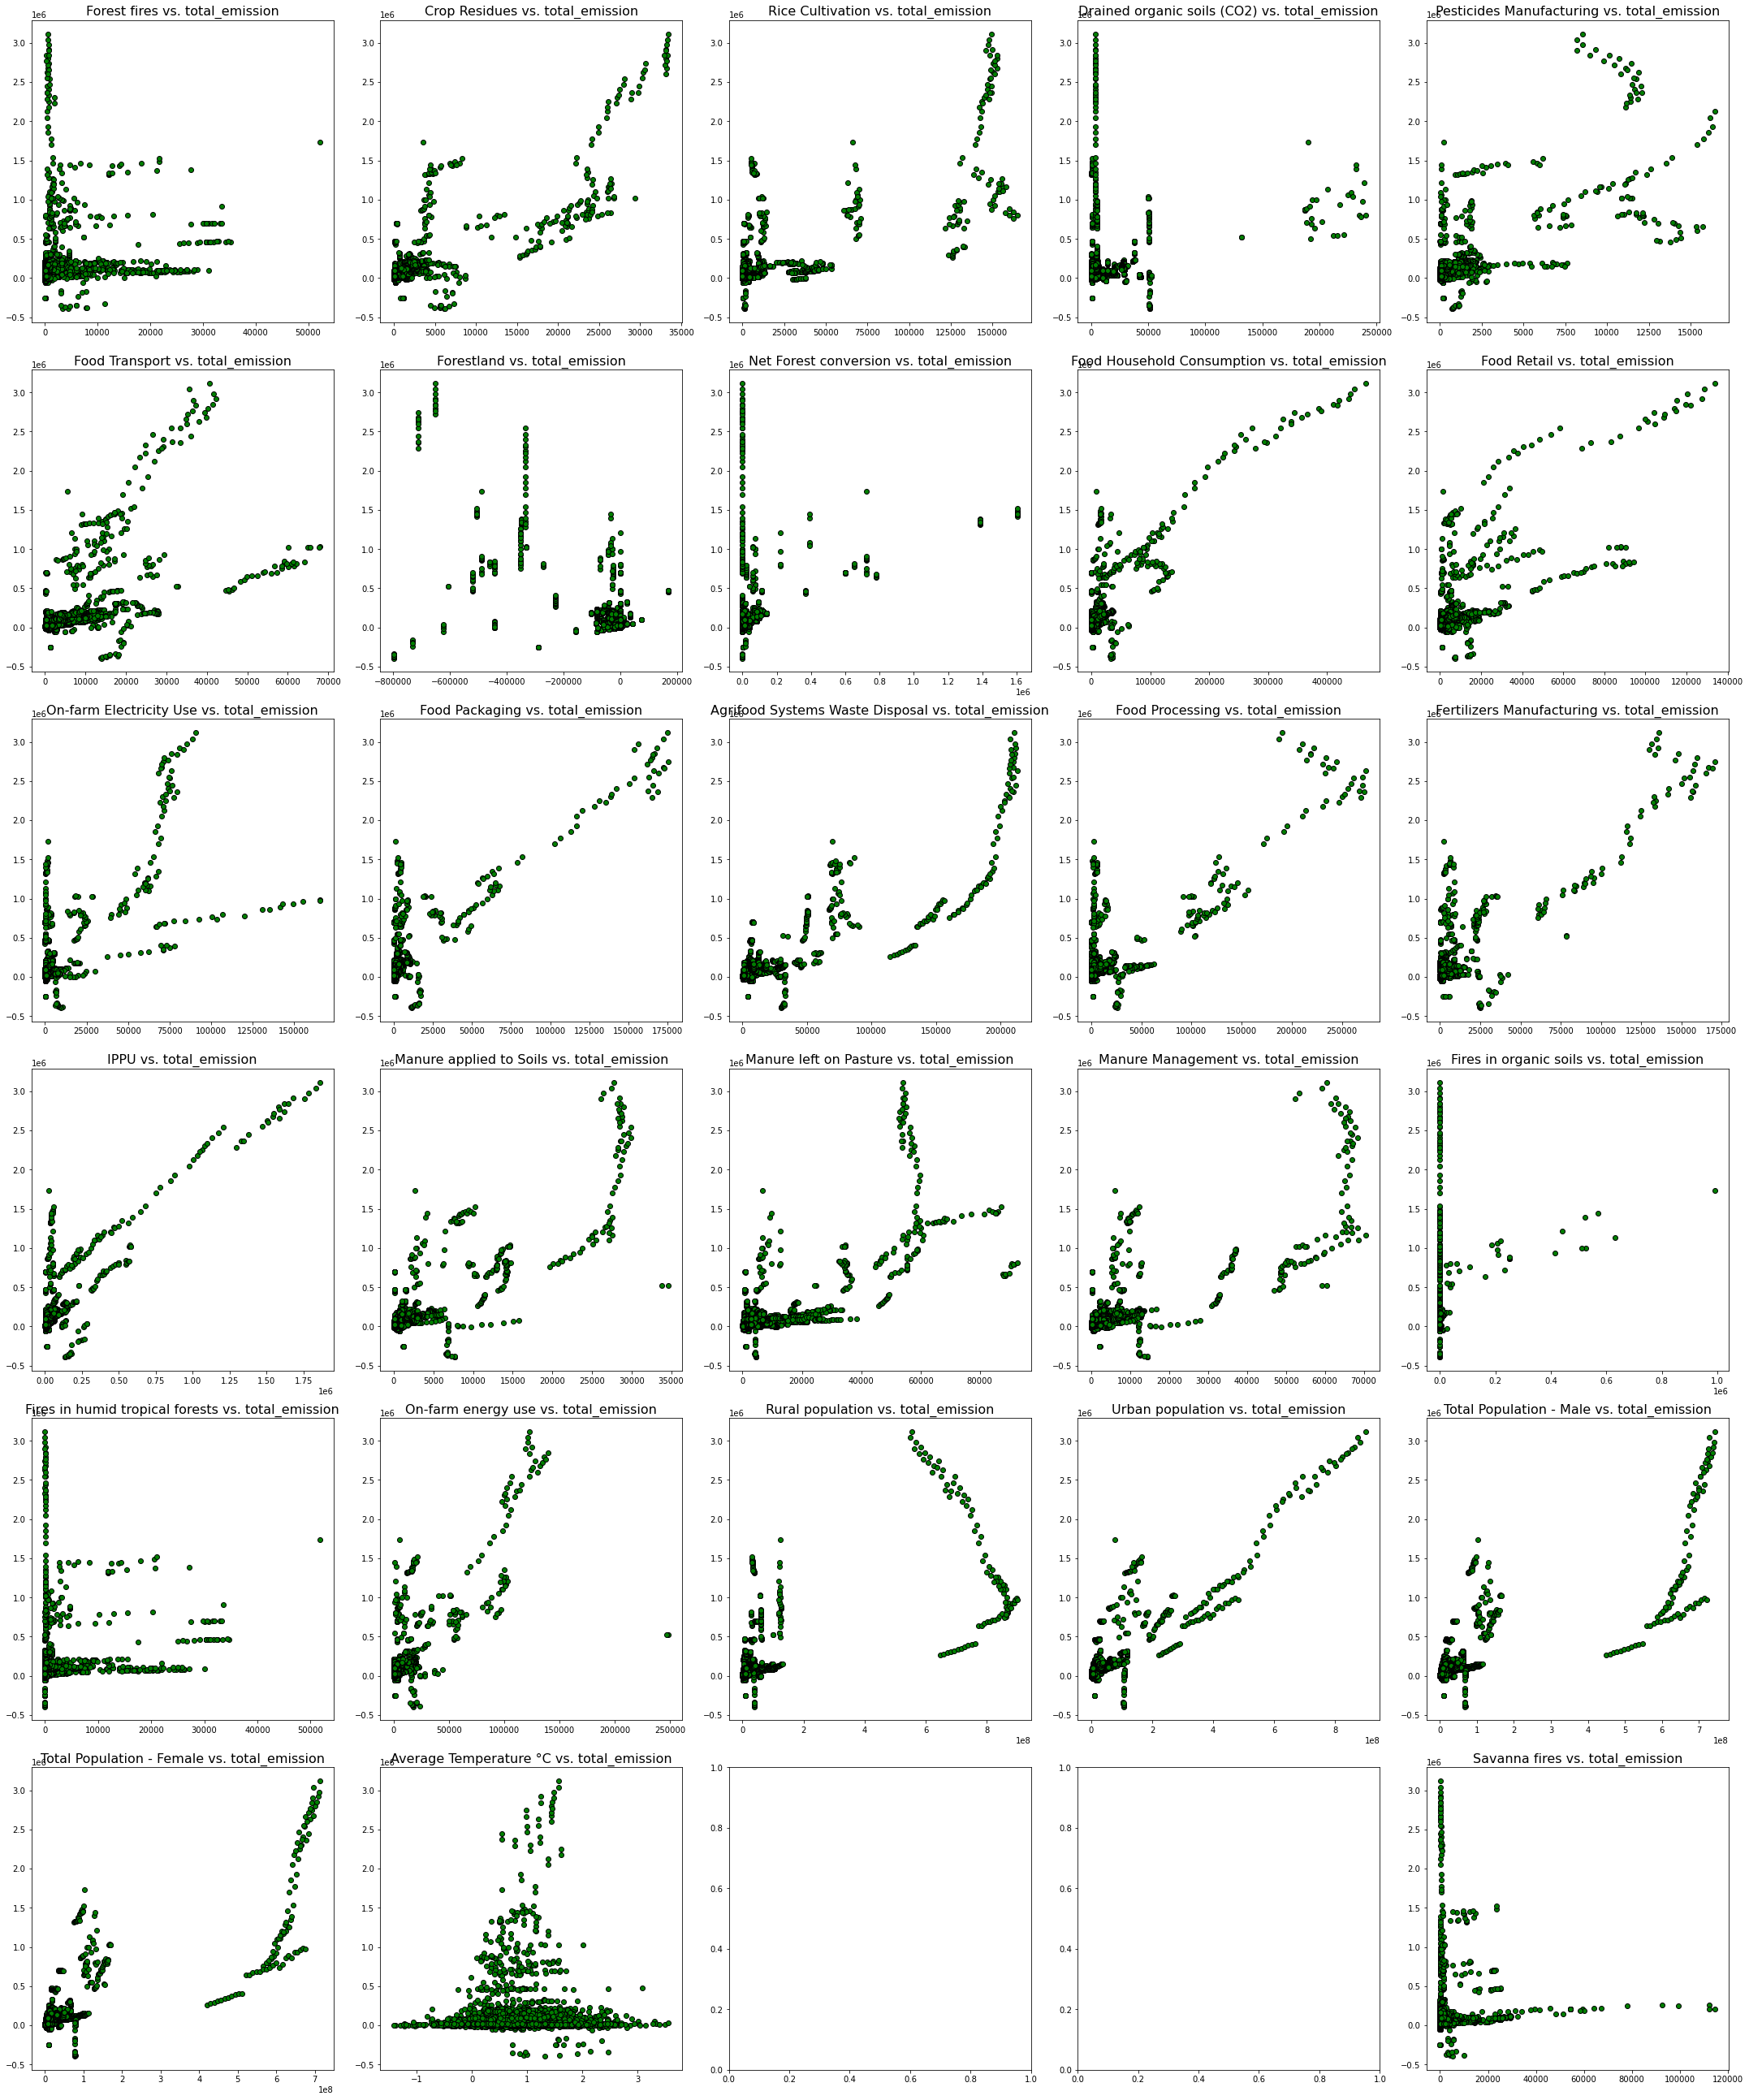

In [26]:
fig, axs = plt.subplots(6,5, figsize=(30,36),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()


df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'total_emission', 'Continent'],axis = 1)

for index, column in enumerate(df_copy_2.columns):
    axs[index-1].set_title("{} vs. total_emission".format(column),fontsize=16)
    axs[index-1].scatter(x=df_copy_2[column],y=df_copy['total_emission'],color='green',edgecolor='k')
    
fig.tight_layout(pad=1)

There is no clear correlation between drained organic soils, forest fires, forest lands, net forest conversion, average temperature, savanna fires, fires in organic soil, fires in humid tropical forests and total emission

In [27]:
df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'Continent'],axis = 1)
#df_copy_2['urban_rural'] = df_copy_2['Urban population']/ df_copy_2['Rural population']

corr = df_copy_2.corr()
dependent_var_corr =  np.abs(corr['total_emission']).sort_values(ascending=False)
print(dependent_var_corr)

total_emission                     1.000000
Urban population                   0.907774
Agrifood Systems Waste Disposal    0.879840
Food Household Consumption         0.860020
IPPU                               0.848324
Food Packaging                     0.842555
Manure applied to Soils            0.841109
Crop Residues                      0.828031
Total Population - Female          0.823163
Total Population - Male            0.818163
Fertilizers Manufacturing          0.816064
Food Processing                    0.814844
Manure Management                  0.800147
On-farm energy use                 0.795028
Rice Cultivation                   0.756638
Food Retail                        0.755753
Manure left on Pasture             0.755672
Pesticides Manufacturing           0.746777
Rural population                   0.705162
On-farm Electricity Use            0.692060
Food Transport                     0.657877
Forestland                         0.641678
Net Forest conversion           

### 5.3  Check for multicolinearity  <a class="anchor" id="section_5_3"></a>


Multicollinearity refers to the presence of a strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

1.  It tends to increase the standard error of the coefficients estimates, making them less precise and leading to wider confidence intervals.

2. It becomes difficult to estimate the effect of any one predictor variable on the response variable because multicollinearity makes the coefficients sensitive to small changes in the model or the data, which can lead to unstable coefficient estimates.

We will test for multicollinearity by creating paired scatter plots of predictors and then creating a correlation heatmap.

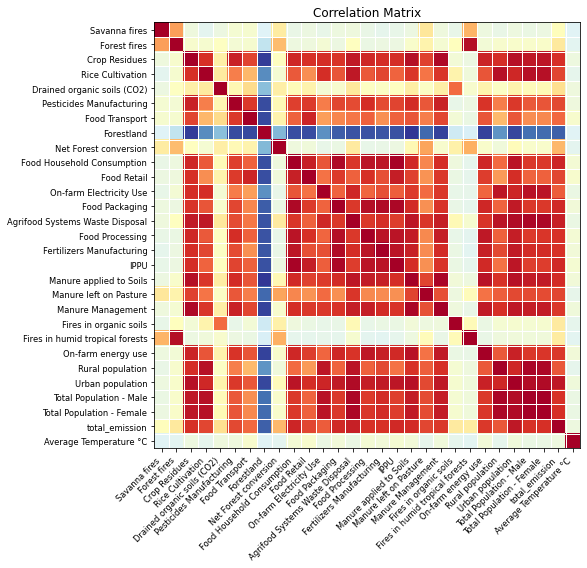

In [28]:
df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'Continent'],axis = 1)
#df_copy_2['urban_rural'] = df_copy_2['Urban population']/ df_copy_2['Rural population']

corr = df_copy_2.corr()
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_corr(corr, xnames=corr.columns, ax=ax)
plt.show()

Given that total emission is the sum from the various sources, the sources are likely to be correlated, due to that we will take the most significant significant source as a the predicator variable and we will thus conduct a univariate analysis. We take the most correlated variable to total emission. We can see several strong correlations among predictors, especially amongst the different types of co2 emssions. As seen above **urban population** is the most correlated variable, **we use this variable as the sole predictor for CO2 emissions**, to avoid the multicolinearity brought about by the other variables. 

### 5.4  Variable variance analysis  <a class="anchor" id="section_5_4"></a>

Variance thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.
For example, suppose that in our loans dataset 97% of observations were for 40-year-old women, then the Age and Gender features can be removed without a great loss in information.

Note: Variance is dependent on scale, so the features will have to be normalised before implementing variance thresholding.

In [29]:
# Separate data into independent (X) and independent (y) variables
df_copy_2 = df_copy.drop(columns=['Area', 'Year', 'Continent'])
X_names = list(df_copy_2.columns)
y_name = 'total_emission'
X_names.remove(y_name)
X_data = df_copy_2[X_names]
y_data = df_copy_2[y_name]

# Normalize data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.005)

# Use the object to apply the threshold on data
selector.fit(X_normalize)


# Get column variances
column_variances = selector.variances_


vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
27,Average Temperature °C,0.012491
3,Rice Cultivation,0.011406
19,Manure Management,0.011076
13,Agrifood Systems Waste Disposal,0.010790
25,Total Population - Male,0.010456
26,Total Population - Female,0.010333
23,Rural population,0.009779
2,Crop Residues,0.009772
18,Manure left on Pasture,0.009657
5,Pesticides Manufacturing,0.007539


## 6. Modelling  <a class="anchor" id="chapter6"></a>
### 6.1 Time Series Forecasting  <a class="anchor" id="chapter_6_1"></a>

We use time series forecasting to make predictions on the $CO_2$ emissions in the near future using historical data. This regression is not the main forecast of our analysis and we there use one model most suitable for our data.

**ARIMA Model**

The ARIMA (Autoregressive Integrated Moving Average) is a widely used model that combines autoregression, differencing (to make the data stationary), and moving average. It’s great for any univariate 'non seasonal' time series data that exhibits patterns. It is characterized by three terms 1) p, the order of autoregression (number of time lags), 2) d, the degree of differencing (number of times the data have had past values subtracted) and 3) q, the order of the moving-average model (number of lagged forecast errors in the prediction equation).

In [30]:
train = grouped[grouped.Year <= 2013][['Year','total_emission']]
test = grouped[grouped.Year >= 2013][['Year','total_emission']]


Y_train = train['total_emission']
X_train = train['Year']

Y_test = test['total_emission']
X_test = test['Year']

How to find the order of differencing ?  We only need differencing if the series is non-stationary. Else, no differencing is needed, that is, d=0. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [31]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(grouped.total_emission.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.332840
p-value: 0.978802


So, in our case, if p-value = 0.9788 > 0.05 we go ahead with finding the order of differencing. There is a methodological way to determine the order of difference, but again this is not the main regression of the project and we merely adjust the parameters and find the parameters that work best, but we not that $d > 0$

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,0 ARIMA Model
model_1 = ARIMA(Y_train, order=(1,2,0))
model_1_fit = model_1.fit(disp=0)


# 3,1,2 ARIMA Model
model_2 = ARIMA(Y_train, order=(3,1,0))
model_2_fit = model_2.fit(disp=0)

# 6,2,1 ARIMA Model
model_3 = ARIMA(Y_train, order=(6,2,1))
model_3_fit = model_3.fit(disp=0)




Othere models such as **SARIMA** and the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)  extends the traditional ARIMA model to account for seasonality and external factors. Our data does not necessary have seasonal trends, thus it won't be necessarily to observe how these models perform in our data

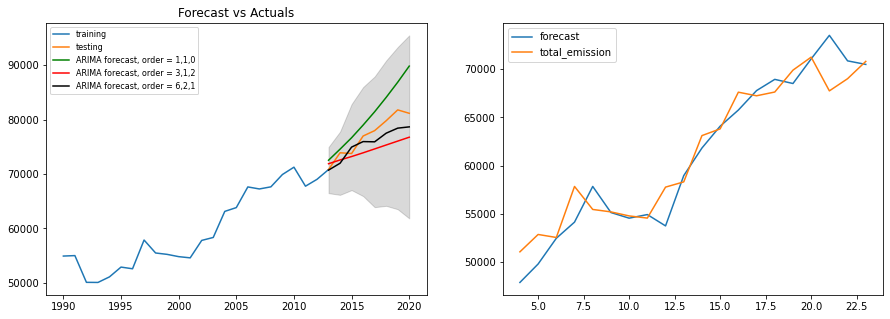

In [33]:
fig , axs = plt.subplots(1, 2, figsize=(15, 5))

# Forecast
fc, se, conf = model_1_fit.forecast(len(X_test), alpha=0.05)  # 95% conf
fc2, se, conf = model_2_fit.forecast(len(X_test), alpha=0.05)  # 95% conf
fc3, se, conf = model_3_fit.forecast(len(X_test), alpha=0.05)  # 95% conf

RMSE =[np.sqrt(mean_squared_error(Y_test, fc)), np.sqrt(mean_squared_error(Y_test, fc2)), np.sqrt(mean_squared_error(Y_test, fc3))]

# Make as pandas series
fc3_series = pd.Series(fc3, index=X_test)
lower_series = pd.Series(conf[:, 0], index=X_test)
upper_series = pd.Series(conf[:, 1], index=X_test)

#fc_series_sm = pd.Series(fc_sm, index=x_test)
                                           
# Plot
axs[0].plot(X_train, Y_train, label='training')
axs[0].plot(X_test, Y_test, label='testing')
axs[0].plot(X_test, fc, label='ARIMA forecast, order = 1,1,0', color = 'green')
axs[0].plot(X_test, fc2, label='ARIMA forecast, order = 3,1,2', color = 'red')
axs[0].plot(X_test, fc3_series, label='ARIMA forecast, order = 6,2,1', color = 'black')
axs[0].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
axs[0].set_title('Forecast vs Actuals')
axs[0].legend(loc='upper left', fontsize=8)



grouped = df_copy.groupby(['Year']).mean().reset_index() # group data by year 


# Plot scatter of CO2 emission by year 


model_3_fit.plot_predict(dynamic=False, ax = axs[1])


coefficients = np.polyfit(grouped.Year, grouped.total_emission,1)
slope, intercept = coefficients

# Generate the line of best fit
line_of_best_fit = slope * grouped.Year + intercept

# Plot the data points
#plt.plot(grouped.Year, line_of_best_fit, color='black', label='Data points')


fig.show()

In [34]:
RMSE

[4294.343554195063, 3469.3661217309887, 2035.7921707661137]

The ARIMA model with ordering 6,2,1 thus far has the least worst RMSE, and is thus the best model, there are more structured ways to find the optimal parameters, but for this exercise we manually found suitable parameter combinations. 

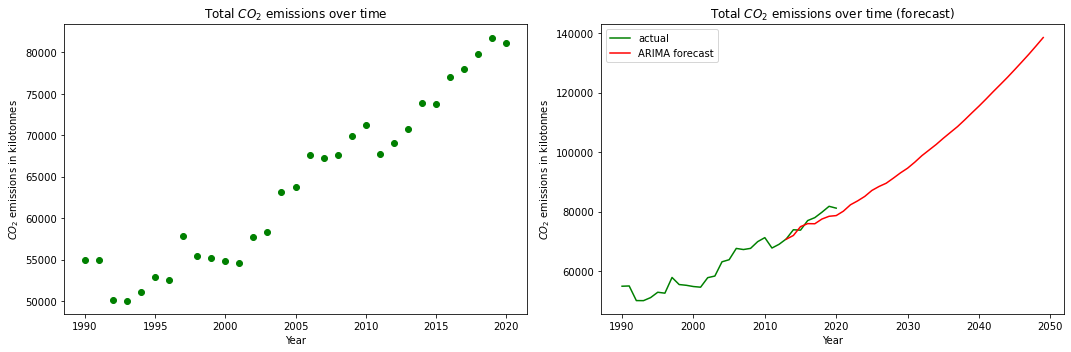

In [35]:
grouped = df_copy.groupby(['Year']).mean().reset_index() # group data by year 

fig , axs = plt.subplots(1, 2, figsize=(15, 5))
# Plot scatter of CO2 emission by year 
axs[0].scatter(grouped.Year, grouped.total_emission, color = 'g')
axs[0].set_title('Total '+ r'$CO_2$' + ' emissions over time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel( r'$CO_2$'+ ' emissions in kilotonnes')


X_new =np.array([*range(2013,2050,1)])
fc, se, conf = model_3_fit.forecast(len(X_new), alpha=0.05)
axs[1].plot(grouped.Year, grouped.total_emission, color = 'g', label = 'actual')
axs[1].plot(X_new, fc, label='ARIMA forecast', color = 'red')
axs[1].set_title('Total '+ r'$CO_2$' + ' emissions over time (forecast)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel( r'$CO_2$'+ ' emissions in kilotonnes')
axs[1].legend()


fig.tight_layout()
fig.show()

### 6.2 Predictive Regression  <a class="anchor" id="chapter_6_2"></a>

**Train and test split, scale and normalize**

In [36]:
# Reduced dataframe 

#df_copy_2 = df_copy.drop(columns=['Area', 'Year', 'Continent'])
#df_c = df_copy_2.copy()

# The dependent variable:
y_name = 'total_emission'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
#X_names = [col for col in df_c.columns if col != y_name]
X_names = 'Urban population'

x = df_copy[X_names]
y = df_copy[y_name]

# Initialise the scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
x_scaled = x_scaler.fit_transform(np.array(x)[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis])  

# split into train and test, 80-20 rule
x_train, x_test, y_train, y_test = train_test_split(x_scaled, 
                                                    y_scaled, 
                                                    test_size=0.20, 
                                                    random_state=1)


**Model 1: Multiple linear regression**

Fitting a multiple linear regression model is similar to fitting a simple linear regression. This time, of course, our  𝑋
contains multiple columns, where it only contained one before.

In [37]:
#create model object 
lm = LinearRegression()

# Fit and train model
lm.fit(x_train,y_train)


LinearRegression()

**Model 2: Ridge regression**

Fitting the model using `Ridge regression`, also known as L2 regulzarization. Handles feature selection by shrinking some coefficients to zero. Reduces model complexity and overfitting by shrinking coefficients.

In [38]:
#create model object 
ridge = Ridge(alpha=0.1)
ridge_1 = Ridge(alpha=0.5)
ridge_2 = Ridge(alpha=1)

# Fit and train model
ridge.fit(x_train, y_train)
ridge_1.fit(x_train, y_train)
ridge_2.fit(x_train, y_train)

Ridge(alpha=1)

**Model 3: Lasso regression**

Fitting the model using `Lasso regression`, also known as L1 regulzarization. Handles multicolineariity by applying penalty to coefficients. Performs automatic feature selection, great for reducing irrelevant features.

In [39]:
#create model object 
lasso  = Lasso(alpha=0.1)
lasso_1 = Lasso(alpha=0.5)
lasso_2  = Lasso(alpha= 1)

#Train the model
lasso.fit(x_train, y_train)
lasso_1.fit(x_train, y_train)
lasso_2.fit(x_train, y_train)


Lasso(alpha=1)

**Model 4: ElasticNet regression**

 Fitting the model using `ElasticNet regression` , a combination of L1 and L2 regularization, to capture some of the non linear relationships betweeb variables.

In [40]:
from sklearn.linear_model import ElasticNet
Enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
Enet_1 = ElasticNet(alpha=0.5, l1_ratio=0.5)
Enet_2 = ElasticNet(alpha=0.5, l1_ratio=0.1)

#Train model
Enet.fit(x_train, y_train)
Enet_1.fit(x_train, y_train)
Enet_2.fit(x_train, y_train)

ElasticNet(alpha=0.5, l1_ratio=0.1)

**Model 5: Random forest**

In [41]:
#create model object 
rf = RandomForestRegressor(random_state=42, max_depth=4)
rf_1 = RandomForestRegressor(n_estimators = 200, random_state=42, max_depth=4)
rf_2 = RandomForestRegressor(n_estimators = 100, random_state=42, max_depth=8)

# Train the model
rf.fit(x_train,y_train)
rf_1.fit(x_train,y_train)
rf_2.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, random_state=42)

**Model 6: Support Vector Regression (SVR)**
    
Support Vector Regression (SVR) is a powerful model derived from Support Vector Machines (SVM). It is particularly good at handling nonlinear relationships and works well for both small and medium-sized datasets. SVR aims to fit the best possible line (or hyperplane) within a certain margin of tolerance to predict continuous values

In [42]:
# Create SVR model with RBF kernel
svr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1, epsilon=0.1))
svr_1 = make_pipeline(StandardScaler(), SVR(kernel='linear', C=0.5, epsilon=0.9))
svr_2 = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1, epsilon=0.1))

# Fit the model
svr.fit(x_train, y_train)
svr_1.fit(x_train, y_train)
svr_2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, kernel='linear'))])

**Model 7: Stacking Regression**

In [43]:
from sklearn.ensemble import StackingRegressor

We did not conduct a regressiona analysis for this bit, it is only but a subset of the project and not the main regression. Unlike time-series data where the chronological order is crucial

## 7. Model Performance   <a class="anchor" id="chapter7"></a>

### 7.1 Comparative analysis   <a class="anchor" id="chapter_7_1"></a>

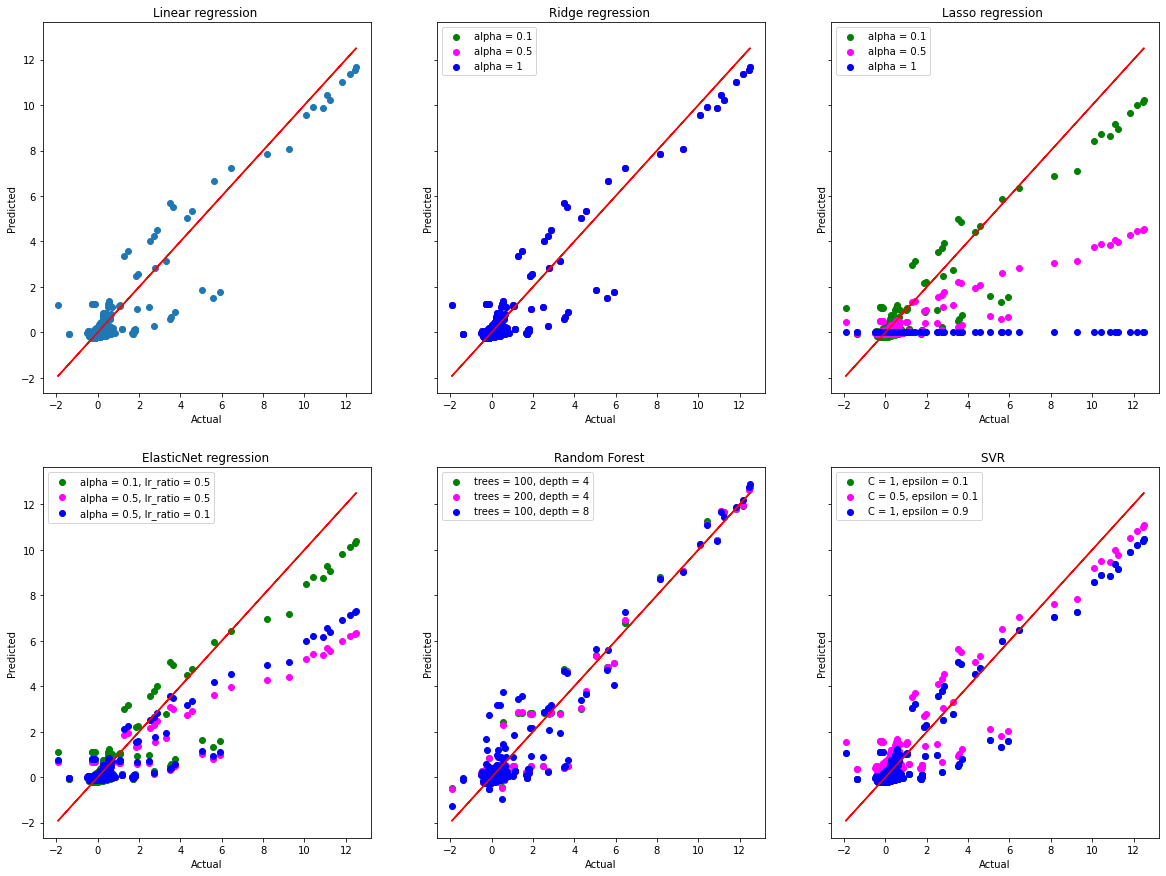

In [44]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20, 15), nrows=2, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(x_train),
              [ridge.predict(x_train), 
               ridge_1.predict(x_train), 
               ridge_2.predict(x_train)],
              [lasso.predict(x_train), 
               lasso_1.predict(x_train), 
               lasso_2.predict(x_train)],
              [Enet.predict(x_train), 
               Enet_1.predict(x_train), 
               Enet_2.predict(x_train)],
              [rf.predict(x_train), 
               rf_1.predict(x_train), 
               rf_2.predict(x_train)],
              [svr.predict(x_train), 
               svr_1.predict(x_train), 
               svr_2.predict(x_train)]]
test_pred = [lm.predict(x_test),
              [ridge.predict(x_test), 
               ridge_1.predict(x_test), 
               ridge_2.predict(x_test)],
              [lasso.predict(x_test), 
               lasso_1.predict(x_test), 
               lasso_2.predict(x_test)],
              [Enet.predict(x_test), 
               Enet_1.predict(x_test), 
               Enet_2.predict(x_test)],
              [rf.predict(x_test), 
               rf_1.predict(x_test), 
               rf_2.predict(x_test)],
              [svr.predict(x_test), 
               svr_1.predict(x_test), 
               svr_2.predict(x_test)]]
title = ['Linear regression', 'Ridge regression', 'Lasso regression' ,'ElasticNet regression', 'Random Forest', 'SVR']

# Key:
# No threshold – linear regression with all predictive variables
# Corr threshold – linear regression with correlation-thresholded predictive variables
# Var threshold – linear regression with variance-thresholded predictive variables


# Loop through all axes to plot each model's results

title_str = f"{title[0]} "
ax[0,0].set_title(title_str)
ax[0,0].set_xlabel('Actual')
ax[0,0].set_ylabel('Predicted')
ax[0,0].plot(y_test, y_test, 'r')
ax[0,0].scatter(y_test, test_pred[0])

title_str = f"{title[1]} "
ax[0,1].set_title(title_str)
ax[0,1].set_xlabel('Actual')
ax[0,1].set_ylabel('Predicted')
ax[0,1].plot(y_test, y_test, 'r')
ax[0,1].scatter(y_test, test_pred[1][0], label ="alpha = 0.1", color = "green")
ax[0,1].scatter(y_test, test_pred[1][1],label ="alpha = 0.5", color = "magenta")
ax[0,1].scatter(y_test, test_pred[1][2],label ="alpha = 1", color = "blue")
ax[0,1].legend()


title_str = f"{title[2]} "
ax[0,2].set_title(title_str)
ax[0,2].set_xlabel('Actual')
ax[0,2].set_ylabel('Predicted')
ax[0,2].plot(y_test, y_test, 'r')
ax[0,2].scatter(y_test, test_pred[2][0], label ="alpha = 0.1", color = "green")
ax[0,2].scatter(y_test, test_pred[2][1],label ="alpha = 0.5", color = "magenta")
ax[0,2].scatter(y_test, test_pred[2][2],label ="alpha = 1", color = "blue")
ax[0,2].legend()


title_str = f"{title[3]} "
ax[1,0].set_title(title_str)
ax[1,0].set_xlabel('Actual')
ax[1,0].set_ylabel('Predicted')
ax[1,0].plot(y_test, y_test, 'r')
ax[1,0].scatter(y_test, test_pred[3][0], label ="alpha = 0.1, lr_ratio = 0.5", color = "green")
ax[1,0].scatter(y_test, test_pred[3][1],label ="alpha = 0.5, lr_ratio = 0.5", color = "magenta")
ax[1,0].scatter(y_test, test_pred[3][2],label ="alpha = 0.5, lr_ratio = 0.1", color = "blue")
ax[1,0].legend()


title_str = f"{title[4]} "
ax[1,1].set_title(title_str)
ax[1,1].set_xlabel('Actual')
ax[1,1].set_ylabel('Predicted')
ax[1,1].plot(y_test, y_test, 'r')
ax[1,1].scatter(y_test, test_pred[4][0], label ="trees = 100, depth = 4", color = "green")
ax[1,1].scatter(y_test, test_pred[4][1],label ="trees = 200, depth = 4", color = "magenta")
ax[1,1].scatter(y_test, test_pred[4][2],label ="trees = 100, depth = 8", color = "blue")
ax[1,1].legend()


title_str = f"{title[5]} "
ax[1,2].set_title(title_str)
ax[1,2].set_xlabel('Actual')
ax[1,2].set_ylabel('Predicted')
ax[1,2].plot(y_test, y_test, 'r')
ax[1,2].scatter(y_test, test_pred[5][0], label ="C = 1, epsilon = 0.1", color = "green")
ax[1,2].scatter(y_test, test_pred[5][1],label ="C = 0.5, epsilon = 0.1", color = "magenta")
ax[1,2].scatter(y_test, test_pred[5][2],label ="C = 1, epsilon = 0.9", color = "blue")
ax[1,2].legend()
        
    
    
fig.tight_layout()
fig.show()
    

In [46]:
for i in range(6):
    print(title[i])
    if i == 0:
        print('train MSE = '+ str(round(mean_squared_error(train_pred[i],y_train),4)))
        print('test MSE = '+ str(round(mean_squared_error(test_pred[i],y_test),4)))
        print(f"train $r^{2}$"+ str(round(r2_score(train_pred[i],y_train),4)))
        print(f"test $r^{2}$ "+ str(round(r2_score(test_pred[i],y_test),4)))
   
    else:
        for j in range(3):
            print('train MSE = ' + str(round(mean_squared_error(train_pred[i][j],y_train),4)))
            print('test MSE = ' + str (round(mean_squared_error(test_pred[i][j],y_test),4)))
            print(f"train $r^{2}$"+ str(round(r2_score(train_pred[i][j],y_train),4)))
            print(f"test $r^{2}$"+ str(round(r2_score(test_pred[i][j],y_test),4)))
           

Linear regression
train MSE = 0.1863
test MSE = 0.1347
train $r^2$0.7491
test $r^2$ 0.8802
Ridge regression
train MSE = 0.1863
test MSE = 0.1347
train $r^2$0.7491
test $r^2$0.8802
train MSE = 0.1863
test MSE = 0.1347
train $r^2$0.7491
test $r^2$0.8802
train MSE = 0.1863
test MSE = 0.1347
train $r^2$0.749
test $r^2$0.8802
Lasso regression
train MSE = 0.1973
test MSE = 0.1545
train $r^2$0.6554
test $r^2$0.8219
train MSE = 0.462
test MSE = 0.5678
train $r^2$-3.0774
test $r^2$-2.3087
train MSE = 0.9288
test MSE = 1.2847
train $r^2$0.0
test $r^2$-1.0929096026294568e+38
ElasticNet regression
train MSE = 0.1953
test MSE = 0.1511
train $r^2$0.668
test $r^2$0.8304
train MSE = 0.34
test MSE = 0.379
train $r^2$-0.5413
test $r^2$-0.1346
train MSE = 0.2893
test MSE = 0.3001
train $r^2$0.0109
test $r^2$0.3224
Random Forest
train MSE = 0.0898
test MSE = 0.0824
train $r^2$0.8902
test $r^2$0.9342
train MSE = 0.0894
test MSE = 0.082
train $r^2$0.8902
test $r^2$0.9343
train MSE = 0.0525
test MSE = 0.112


Random Forest model is the best performing model and we use this for our prediction, and conduct further analysis.


### 7.2 . Residual analysis   <a class="anchor" id="chapter_7_2"></a>

We have chosen the random forest model as the best model for our predictions, and we do a further regression analysis from the predicted values

In [47]:
#create model object 
rf = RandomForestRegressor(random_state=42, max_depth=4)

# Train the model
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=4, random_state=42)

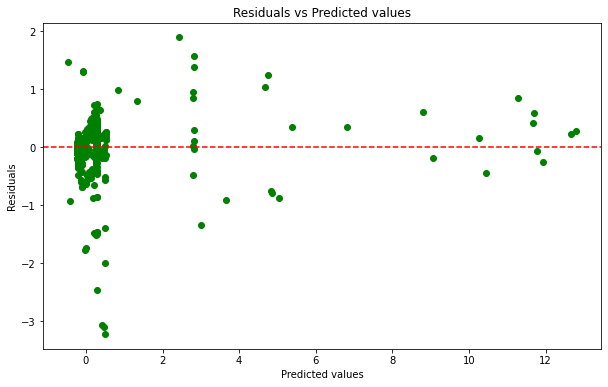

In [49]:
y_test.reshape(1,-1)
y_pred = rf.predict(x_test)

residuals = y_pred-y_test.reshape(1,-1)
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred, y=residuals, color = 'g')
plt.axhline(y=0, color='r', linestyle='--',)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

In [55]:

print('test MSE = ' + str(round(mean_squared_error(y_pred,y_test),4)))
print('train MSE = ' + str (round(mean_squared_error(rf.predict(x_train),y_train),4)))
print(r'test $r^{2}$ = '+ str(round(r2_score(y_pred,y_test),4)))
print(r'train $r^{2}$ ='+ str(round(r2_score(rf.predict(x_train),y_train),4)))


test MSE = 0.0824
train MSE = 0.0898
test $r^{2}$ = 0.9342
train $r^{2}$ =0.8902


There is a clear heteroskedaskicity here, now is the opportunity to deal with the outliers we detected earlier. Urban population had about 116 ouliers, we remove the outliers and examine the performance

**Remove outliers**

In [81]:
import pandas as pd
import numpy as np
from scipy import stats

outliers = 0
df_copy = df_copy[np.abs(stats.zscore(df_copy_2['Urban population'])) < 3]

In [82]:
# Reduced dataframe 

#df_copy_2 = df_copy.drop(columns=['Area', 'Year', 'Continent'])
#df_c = df_copy_2.copy()

# The dependent variable:
y_name = 'total_emission'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
#X_names = [col for col in df_c.columns if col != y_name]
X_names = 'Urban population'

x = df_copy[X_names]
y = df_copy[y_name]

# Initialise the scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
x_scaled = x_scaler.fit_transform(np.array(x)[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis])  

# split into train and test, 80-20 rule
x_train, x_test, y_train, y_test = train_test_split(x_scaled, 
                                                    y_scaled, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [83]:
#create model object 
rf_improv = RandomForestRegressor(random_state=42, max_depth=4)

# Train the model
rf_improv.fit(x_train,y_train)


RandomForestRegressor(max_depth=4, random_state=42)

In [84]:
len(df_copy)

6849

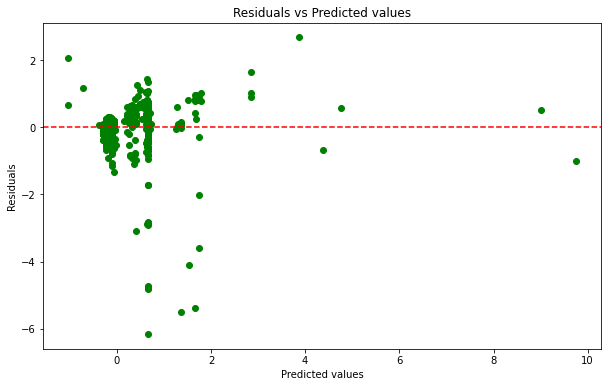

In [85]:

y_pred = rf_improv.predict(x_test)

residuals = y_pred-y_test.reshape(1,-1)
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred, y=residuals, color = 'g')
plt.axhline(y=0, color='r', linestyle='--',)
#sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

In [86]:

print('test MSE = ' + str(round(mean_squared_error(y_pred,y_test),4)))
print('train MSE = ' + str (round(mean_squared_error(rf.predict(x_train),y_train),4)))
print(r'test $r^{2}$ = '+ str(round(r2_score(y_pred,y_test),4)))
print(r'train $r^{2}$ ='+ str(round(r2_score(rf.predict(x_train),y_train),4)))

test MSE = 0.2832
train MSE = 0.9442
test $r^{2}$ = 0.1732
train $r^{2}$ =0.0705


## 10. Conclusion <a class="anchor" id="chapter10"></a>

> <b> Summary of Key Findings:</b> Recap the main insights and results discovered through the analysis. Highlight how these findings answer the initial questions or hypotheses set out in the introduction.

> <b> Evaluation of the Methodology:</b> Discuss the effectiveness of the methods and techniques used. Mention any limitations or challenges encountered during the analysis and how they were addressed or could be addressed in the future.

> <b> Implications of the Findings:</b> Explain the practical or theoretical implications of the results.Discuss how these findings can impact decision-making processes, policy, business strategies, or scientific understanding.

> <b> Suggestions for Future Work:</b> Propose areas for further research or additional questions that emerged from the project. Suggest improvements in data collection, analysis methods, or other aspects that could enhance future studies.

> <b> Reflection on the Data Source and Quality:</b> Reflect on the quality and reliability of the data used. Consider how the data source influenced the outcomes and what could be improved in terms of data quality or variety.

> <b>Concluding Thoughts:</b> Offer a final thought or summary statement that encapsulates the essence of the project and its impact. Encourage readers to consider broader applications or the next steps following from the project’s conclusions.

#### <a href=#cont>Back to Table of Contents</a>

---

## 11. References <a class="anchor" id="chapter11"></a>


<div class="alert alert-block alert-warning">
<b>Example:</b> CO2 emissions. (2024). Our World in Data. Retrieved from https://ourworldindata.org/co2-emissions
</div>


#### <a href=#cont>Back to Table of Contents</a>

---